# Bagel Playground

Check runtime type (CPU or GPU):

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-cac39f23-bff6-1b08-b81a-1de3a4a03233)


Clone the repo and install Bagel:

In [2]:
CODE_DIR = 'bagel-tensorflow'

!git clone https://github.com/AlumiK/bagel-tensorflow.git $CODE_DIR
%cd $CODE_DIR
!pip install -e .

Cloning into 'bagel-tensorflow'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 211 (delta 122), reused 143 (delta 63), pack-reused 0
Receiving objects: 100% (211/211), 2.69 MiB | 23.34 MiB/s, done.
Resolving deltas: 100% (122/122), done.
/content/bagel-tensorflow
Obtaining file:///content/bagel-tensorflow
  Running setup.py develop for bagel-tensorflow


Import libraries:

In [3]:
import os
import bagel
import matplotlib.pyplot as plt

Set some parameters:

In [4]:
EPOCHS = 50
INPUT = os.path.join('sample', 'data')

Run Bagel:

KPI: cpu4
Training Epoch
50/50 [==============================] - 11s 224ms/epoch - loss: -67.6728 - val_loss: -62.2896
Testing Epoch
21/21 [==============================] - 2s 104ms/step - test_loss: -59.3472
Metrics
precision: 1.000 - recall: 1.000 - f1score: 1.000



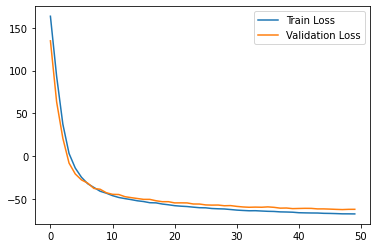

KPI: server_res_eth1out_curve_61
Training Epoch
50/50 [==============================] - 9s 183ms/epoch - loss: -122.2595 - val_loss: -101.5035
Testing Epoch
21/21 [==============================] - 2s 103ms/step - test_loss: -68.5342
Metrics
precision: 0.869 - recall: 1.000 - f1score: 0.930



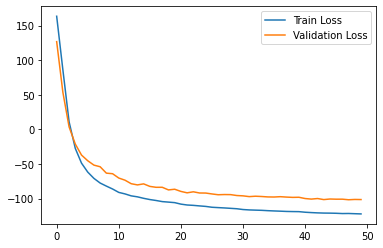

KPI: g
Training Epoch
50/50 [==============================] - 99s 2s/epoch - loss: -37.2661 - val_loss: 77.3290
Testing Epoch
253/253 [==============================] - 4s 17ms/step - test_loss: -4.8290
Metrics
precision: 0.784 - recall: 0.851 - f1score: 0.816



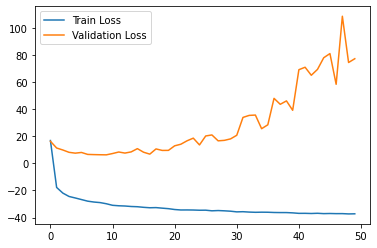

KPI: server_res_eth1out_curve_6
Training Epoch
50/50 [==============================] - 9s 179ms/epoch - loss: -129.9223 - val_loss: -98.2210
Testing Epoch
21/21 [==============================] - 2s 106ms/step - test_loss: -117.7011
Metrics
precision: 1.000 - recall: 1.000 - f1score: 1.000



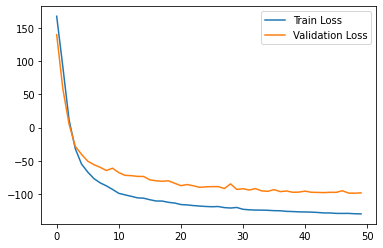

In [5]:
file_list = bagel.utils.file_list(INPUT)
for file in file_list:
    # Read KPI data
    kpi = bagel.utils.load_kpi(file)
    print(f'KPI: {kpi.name}')

    # Fill missing points with 0
    kpi.complete_timestamp()

    # Split the KPI and standardize them
    train_kpi, valid_kpi, test_kpi = kpi.split((0.49, 0.21, 0.3))
    train_kpi, mean, std = train_kpi.standardize()
    valid_kpi, _, _ = valid_kpi.standardize(mean=mean, std=std)
    test_kpi, _, _ = test_kpi.standardize(mean=mean, std=std)

    # Create a Bagel instance
    model = bagel.models.Bagel()

    # Train and test
    r = model.fit(kpi=train_kpi.use_labels(0.),
                  validation_kpi=valid_kpi,
                  epochs=EPOCHS,
                  verbose=1)
    anomaly_scores = model.predict(test_kpi)
    results = bagel.testing.get_test_results(labels=test_kpi.labels,
                                             scores=anomaly_scores,
                                             missing=test_kpi.missing)
    
    # Print metrics
    print('Metrics')
    print(f'precision: {results.get("precision"):.3f} - '
          f'recall: {results.get("recall"):.3f} - '
          f'f1score: {results.get("f1score"):.3f}\n')
    
    # Plot losses
    plt.plot(r.get('loss'), label='Train Loss')
    plt.plot(r.get('val_loss'), label='Validation Loss')
    plt.legend()
    plt.show()